<a href="https://colab.research.google.com/github/hamednasr/Computer-Vision-with-Python/blob/main/Human_Action_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import libraries:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install mediapipe

     |████████████████████████████████| 32.7 MB 1.4 MB/s 


In [ ]:
import tensorflow as tf

In [ ]:
import cv2
import numpy as np
import mediapipe as mp
import os
import time
import matplotlib.pyplot as plt

# keypoints using mediapipe holistic:

In [ ]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

In [ ]:
def mediapipe_detection(image,model):
  results = model.process(image)
  return image, results

In [ ]:
def draw_landmarks(img,results):
  mp_drawing.draw_landmarks(img, 
                            results.face_landmarks,
                            mp_holistic.FACEMESH_TESSELATION,
                            landmark_drawing_spec=mp_drawing.DrawingSpec(color=(0, 0, 255), thickness=1, circle_radius=1),
                            connection_drawing_spec=mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=1, circle_radius=1))
  
  mp_drawing.draw_landmarks(img, 
                            results.pose_landmarks,
                            mp_holistic.POSE_CONNECTIONS,
                            landmark_drawing_spec=mp_drawing.DrawingSpec(color=(0, 0, 255), thickness=1, circle_radius=1),
                            connection_drawing_spec=mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=1, circle_radius=1))
  
  mp_drawing.draw_landmarks(img, 
                            results.right_hand_landmarks,
                            mp_holistic.HAND_CONNECTIONS,
                            landmark_drawing_spec=mp_drawing.DrawingSpec(color=(0, 0, 255), thickness=1, circle_radius=1),
                            connection_drawing_spec=mp_drawing.DrawingSpec(color=(0, 200, 55), thickness=1, circle_radius=1))
  
  mp_drawing.draw_landmarks(img, 
                            results.left_hand_landmarks,
                            mp_holistic.HAND_CONNECTIONS,
                            landmark_drawing_spec=mp_drawing.DrawingSpec(color=(0, 0, 255), thickness=1, circle_radius=1),
                            connection_drawing_spec=mp_drawing.DrawingSpec(color=(0, 55, 200), thickness=1, circle_radius=1))

In [ ]:
cap = cv2.VideoCapture(0)

#initiate holistic model:
with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:
    
    while cap.isOpened():
      ret, frame = cap.read()
      # recolor feed
      
      # img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
      # make detections
      frame, results = mediapipe_detection(frame,holistic)
      # print(results.face_landmarks)  
    
      # recoloring image back to BGR for rendering
      # img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
      
      #face detetction
      draw_landmarks(frame,results)
      
      cv2.imshow('Webcam Feed', frame)

      if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [ ]:
img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

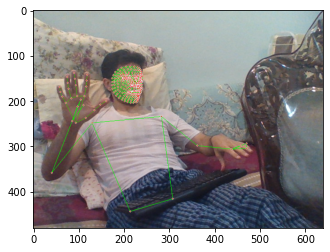

In [ ]:
plt.imshow(img)

In [ ]:
type(results.right_hand_landmarks)

mediapipe.framework.formats.landmark_pb2.NormalizedLandmarkList

In [ ]:
results.right_hand_landmarks

landmark {
  x: 0.14717592298984528
  y: 0.5181282758712769
  z: 2.5974711093113e-07
}
landmark {
  x: 0.18173466622829437
  y: 0.4939453899860382
  z: -0.015857387334108353
}
landmark {
  x: 0.21139585971832275
  y: 0.46032118797302246
  z: -0.024953173473477364
}
landmark {
  x: 0.2318451702594757
  y: 0.43407338857650757
  z: -0.033586010336875916
}
landmark {
  x: 0.2530972957611084
  y: 0.41823533177375793
  z: -0.04248268902301788
}
landmark {
  x: 0.17716540396213531
  y: 0.39583319425582886
  z: -0.014438297599554062
}
landmark {
  x: 0.1829969882965088
  y: 0.35071995854377747
  z: -0.026331719011068344
}
landmark {
  x: 0.18491968512535095
  y: 0.32297274470329285
  z: -0.036456890404224396
}
landmark {
  x: 0.1861991286277771
  y: 0.2975084185600281
  z: -0.04389335215091705
}
landmark {
  x: 0.1526365727186203
  y: 0.3948620557785034
  z: -0.01588367484509945
}
landmark {
  x: 0.14711490273475647
  y: 0.34579282999038696
  z: -0.025941839441657066
}
landmark {
  x: 0.143911

In [ ]:
results

mediapipe.python.solution_base.SolutionOutputs

In [ ]:
len(results.right_hand_landmarks.landmark)

21

In [ ]:
468*3

1404

In [ ]:
results.face_landmarks.landmark

[x: 0.3552562892436981
y: 0.36880961060523987
z: -0.013412907719612122
, x: 0.3613390624523163
y: 0.34577685594558716
z: -0.022161003202199936
, x: 0.3552938401699066
y: 0.3536003828048706
z: -0.012493357993662357
, x: 0.35345885157585144
y: 0.3250636160373688
z: -0.017652111127972603
, x: 0.3617861568927765
y: 0.339067667722702
z: -0.023175250738859177
, x: 0.3598831593990326
y: 0.33083850145339966
z: -0.02097044698894024
, x: 0.3533114790916443
y: 0.3114253282546997
z: -0.00874459557235241
, x: 0.31287938356399536
y: 0.3094024062156677
z: -0.008591093122959137
, x: 0.3513357937335968
y: 0.2985188961029053
z: -0.004879372660070658
, x: 0.35169166326522827
y: 0.29049962759017944
z: -0.0049611353315413
, x: 0.34917229413986206
y: 0.26003026962280273
z: 0.0021069354843348265
, x: 0.35491231083869934
y: 0.3719879686832428
z: -0.012962604872882366
, x: 0.3540354371070862
y: 0.37445056438446045
z: -0.011699870228767395
, x: 0.3528624176979065
y: 0.37550047039985657
z: -0.009975275956094265


In [ ]:
np.array([[r.x,r.y,r.z,r.visibility] for r in results.pose_landmarks.landmark]).flatten() \
if results.pose_landmarks else np.zeros(33*4)

array([ 0.35926938,  0.33631197, -0.18368122,  0.99972719,  0.36541092,
        0.30220053, -0.12815127,  0.99953467,  0.37268323,  0.30261385,
       -0.12839511,  0.99948275,  0.37949449,  0.30308777, -0.12880117,
        0.99936712,  0.33449709,  0.30254516, -0.15942276,  0.99975955,
        0.32173231,  0.30364218, -0.15960905,  0.99974543,  0.30938181,
        0.30505306, -0.15986151,  0.99977589,  0.37687907,  0.31935006,
        0.13907084,  0.99950272,  0.27900511,  0.32891136, -0.00770204,
        0.99988961,  0.37075034,  0.37815294, -0.08384033,  0.99952692,
        0.33604974,  0.37892246, -0.12684566,  0.99986064,  0.44228569,
        0.48834521,  0.28862146,  0.9996593 ,  0.20412457,  0.51803201,
        0.0565353 ,  0.99993044,  0.56686294,  0.62153906,  0.40723625,
        0.86837095,  0.06419492,  0.74642831, -0.32422194,  0.99753296,
        0.68568492,  0.63848227,  0.25565881,  0.88417464,  0.13443454,
        0.50931811, -0.78446031,  0.99464524,  0.73732746,  0.63

In [ ]:
def extract_keypoints(results):
    pose = np.array([[r.x,r.y,r.z,r.visibility] for r in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[r.x,r.y,r.z] for r in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    right_hand = np.array([[r.x,r.y,r.z] for r in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    left_hand = np.array([[r.x,r.y,r.z] for r in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    
    return np.concatenate([pose,face,right_hand,left_hand])

In [ ]:
sequence=[]
keypoints = extract_keypoints(results)
print(keypoints.shape)
sequence.append(keypoints)
sequence = sequence[-30:]
print(sequence)

(1662,)
[array([ 0.35926938,  0.33631197, -0.18368122, ...,  0.        ,
        0.        ,  0.        ])]


# setup folders for collection:

In [ ]:
data_path = 'C:\\Users\\david\\Google Drive\\Colab Notebooks\\Computer Vision'
actions = np.array(['Hi','thank you','iloveyou'])
no_videos = 30
sequences_length = 30

In [ ]:
for action in actions:
    for video in range(no_videos):
        try:
            os.makedirs(os.path.join('C:\\Users\\david\\Google Drive\\Colab Notebooks\\Computer Vision',action,str(video)))  
        except:
            pass        

# collecting keypoint values for train and test

In [ ]:
cap = cv2.VideoCapture(0)

#initiate holistic model:
with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:
    
    for action in actions:
        for video in range(no_videos):
            for frame_num in range(sequences_length):
                
                ret, frame = cap.read()
                # recolor feed

                # img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                # make detections
                image, results = mediapipe_detection(frame,holistic)
                # print(results.face_landmarks)  

                # recoloring image back to BGR for rendering
                # img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

                #face detetction
                draw_landmarks(image,results)

                if frame_num==0:
                    cv2.putText(image,'COLLECTION START',(150,200),
                                cv2.FONT_HERSHEY_COMPLEX,1,(0,0,255),4,cv2.LINE_AA)
                    cv2.putText(image,f'collecting frames for {action} video numer {video}',(15,12),
                                cv2.FONT_HERSHEY_COMPLEX,0.5,(0,255,0),1,cv2.LINE_AA)
                    cv2.imshow('Webcam Feed', image)
                    cv2.waitKey(2000)
                    
                else:
                    cv2.putText(image,f'collecting frames for {action} video numer {video}',(15,12),
                    cv2.FONT_HERSHEY_COMPLEX,0.5,(0,255,0),1,cv2.LINE_AA)
                    
                    cv2.imshow('Webcam Feed', image)
                    
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(data_path,action,str(video),str(frame_num))
                np.save(npy_path,keypoints)

                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break

cap.release()
cv2.destroyAllWindows()

# preprocess data and create labels and features:

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [ ]:
action_path='C:\\Users\\david\\Google Drive\\Colab Notebooks\\Computer Vision\\action_data'
os.path.join(action_path,'thank you')

'C:\\Users\\david\\Google Drive\\Colab Notebooks\\Computer Vision\\action_data\\thank you'

In [ ]:
actions

array(['Hi', 'thank you', 'iloveyou'], dtype='<U9')

In [ ]:
label_map = {label:num for num, label in enumerate(actions)}
label_map

{'Hi': 0, 'thank you': 1, 'iloveyou': 2}

In [ ]:
sequences = []
labels = []
actions
for action in actions:
  for video in range(no_videos):
    window = []
    for frame_num in range(sequences_length):
      res = np.load(os.path.join(action_path,action,str(video),f'{frame_num}.npy'))
      window.append(res)
    sequences.append(window)
    labels.append(label_map[action])

In [ ]:
labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

In [ ]:
X = np.array(sequences)
y = np.array(labels)

In [ ]:
X.shape

(90, 30, 1662)

In [ ]:
y.shape

(90,)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=22)

In [ ]:
X_train.shape

(81, 30, 1662)

# Creating LSTM deep learning model:

In [ ]:
tensorboard=tf.keras.callbacks.TensorBoard(log_dir='logs')

In [ ]:
model = tf.keras.models.Sequential([
                    tf.keras.layers.LSTM(64,activation='relu', return_sequences=True),
                    tf.keras.layers.LSTM(128,activation='relu', return_sequences=True),
                    tf.keras.layers.LSTM(64,activation='relu', return_sequences=False),
                    tf.keras.layers.Dense(64,activation='relu'),
                    tf.keras.layers.Dense(32,activation='relu'),
                    tf.keras.layers.Dense(actions.shape[0],activation='softmax')
                    ])

In [ ]:
model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy', 
              metrics='accuracy' )

In [ ]:
model.fit(X_train,y_train,epochs=120,callbacks=tensorboard)

Epoch 1/120
3/3 [==============================] - 1s 133ms/step - loss: 1.3939 - accuracy: 0.6543
Epoch 2/120
3/3 [==============================] - 0s 130ms/step - loss: 1.0109 - accuracy: 0.7901
Epoch 3/120
3/3 [==============================] - 0s 139ms/step - loss: 0.4918 - accuracy: 0.8025
Epoch 4/120
3/3 [==============================] - 0s 131ms/step - loss: 0.2574 - accuracy: 0.8889
Epoch 5/120
3/3 [==============================] - 0s 172ms/step - loss: 0.8385 - accuracy: 0.8519
Epoch 6/120
3/3 [==============================] - 0s 134ms/step - loss: 0.1755 - accuracy: 0.9383
Epoch 7/120
3/3 [==============================] - 0s 139ms/step - loss: 0.4078 - accuracy: 0.8395
Epoch 8/120
3/3 [==============================] - 0s 131ms/step - loss: 0.6069 - accuracy: 0.8272
Epoch 9/120
3/3 [==============================] - 0s 152ms/step - loss: 0.4637 - accuracy: 0.8272
Epoch 10/120
3/3 [==============================] - 0s 148ms/step - loss: 0.5701 - accuracy: 0.7160
Epoch 11/

3/3 [==============================] - 0s 137ms/step - loss: 0.1563 - accuracy: 0.9383
Epoch 84/120
3/3 [==============================] - 0s 141ms/step - loss: 0.1987 - accuracy: 0.9506
Epoch 85/120
3/3 [==============================] - 0s 145ms/step - loss: 0.0929 - accuracy: 0.9753
Epoch 86/120
3/3 [==============================] - 0s 137ms/step - loss: 0.1782 - accuracy: 0.9259
Epoch 87/120
3/3 [==============================] - 0s 131ms/step - loss: 0.1954 - accuracy: 0.9506
Epoch 88/120
3/3 [==============================] - 0s 126ms/step - loss: 0.2074 - accuracy: 0.9136
Epoch 89/120
3/3 [==============================] - 0s 128ms/step - loss: 0.0221 - accuracy: 0.9877
Epoch 90/120
3/3 [==============================] - 0s 127ms/step - loss: 0.1212 - accuracy: 0.9877
Epoch 91/120
3/3 [==============================] - 0s 136ms/step - loss: 0.0444 - accuracy: 0.9877
Epoch 92/120
3/3 [==============================] - 0s 132ms/step - loss: 0.0506 - accuracy: 0.9877
Epoch 93/120


In [ ]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 1s 702ms/step - loss: 2.1659 - accuracy: 0.8889


[2.1658527851104736, 0.8888888955116272]

In [ ]:
ypred = np.argmax(model.predict(X_test),axis=1)
ypred

array([0, 1, 2, 1, 2, 2, 0, 0, 0], dtype=int64)

In [ ]:
y_test

array([0, 1, 2, 1, 2, 2, 0, 0, 1])

In [ ]:
os.path.join(action_path,'action.h5')

'C:\\Users\\david\\Google Drive\\Colab Notebooks\\Computer Vision\\action_data\\action.h5'

In [ ]:
model.save('C:\\Users\\david\\Google Drive\\Colab Notebooks\\Computer Vision\\action.h5')

In [ ]:
# model.load_weights('C:\\Users\\david\\Google Drive\\Colab Notebooks\\Computer Vision\\action.h5')   

# real time detection:

In [ ]:
sequence = []
sentence = []
threshold = 0.5

cap = cv2.VideoCapture(0)

#initiate holistic model:
with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:
    
    while cap.isOpened():
      ret, frame = cap.read()
      # recolor feed
        
      #make detections
      frame, results = mediapipe_detection(frame,holistic)
      # print(results.face_landmarks)  
        
      #face detetction
      draw_landmarks(frame,results)
        
      keypoints = extract_keypoints(results)
      sequence.append(keypoints)
      sequence = sequence[-30:]
    
      if len(sequence)==30:
            pred = model.predict(np.expand_dims(sequence,axis=0))
            action = actions[np.argmax(pred)]
    #             print(action)

            if np.max(pred) > threshold:
                if sentence:
                    if action !=sentence[-1]:
                        sentence.append(action)
                else:
                    sentence.append(action)
                sentence = sentence[-5:]
            
            
      cv2.rectangle(frame,(0,0),(640,40),(245,117,16),-1)
      cv2.putText(frame, ' '.join(sentence),
                  (3,30),cv2.FONT_HERSHEY_SIMPLEX,1,
                  (255,255,255),2,cv2.LINE_AA)
       
      cv2.imshow('Webcam Feed', frame)

      if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()